<a href="https://colab.research.google.com/github/Nitish347/Auto-File-Arranger/blob/master/Youtube_Video_Transcript_Summarization_with_Hugging_Face_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers

In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [21]:
youtube_video = "https://www.youtube.com/watch?v=JhaFxsMp1sQ"

In [22]:
video_id = youtube_video.split("=")[1]

In [23]:
video_id

'JhaFxsMp1sQ'

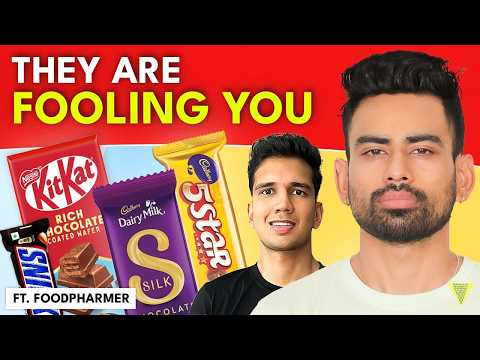

In [24]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [25]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [9]:
transcript[0:5]

[{'text': "for Germany it's the end of an era and",
  'start': 1.439,
  'duration': 5.46},
 {'text': "as Europe's biggest economy there are",
  'start': 4.859,
  'duration': 4.801},
 {'text': 'some huge challenges ahead', 'start': 6.899, 'duration': 4.32},
 {'text': 'from its increasingly complex', 'start': 9.66, 'duration': 3.84},
 {'text': 'relationship with China to climate',
  'start': 11.219,
  'duration': 4.98}]

In [26]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

11445


In [27]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [28]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 Do you like eating chocolates like dairy 
milk, 5 star or snickers? But at the same   time do you also not enjoy them guilt free 
because you know that most of the chocolates   sold in Indian market have more sugar than 
chocolate in them. But don’t worry as I wish   to share with you 5 healthy chocolates in 
the indian market that you can occasionally   eat guilt free. Towards the end of the video, 
I will also share with you a tasty homemade   chocolate recipe that is easier than making tea. 
So without any further delay let’s get started.  Hello Friends! Welcome to Fit Tuber. Visit 
the market and you will find that there are   basically 3 types of chocolates in India. First 
are the thick center type chocolates like 5 star,   Barone and snickers. You might consider them 
healthy. As a source of energy or something.   But how they fool us with their marketing, 
lets understand this from food pharmer.   Second are wafer type chocolates like 
munch, perk and kitkat. (FP v

Your max_length is set to 142, but your input_length is only 121. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)


Summarized text
 Mamaearth’s rosemary hair growth oil is one good hair oil in the Indian market . It has no mineral oil, no artificial fragrance nor any harmful preservatives like TBHQ and BHT . In this oil herbs like rosemary, bhringraj, amla, curry leaf, almond, methi dana, aloe vera and brahmi have been boiled in a blend of castor and coconut oil .
input text 
growth of your hair. 150 ml pack 
of Mamaearth’s this special hair growth oil will   cost you Rs 419. Apply FITTUBER21 discount and you 
will get the same for Rs 330. Made safe certified,   suitable for all hair types, to buy 
mamaearth’s this special hair growth oil,   click the link in description box.
There are 4 things best for hair growth.   To know what they are, checkout this video. My 
name is Vivek, I thank you so much for watching.
Summarized text
 150ml pack of Mamaearth’s this special hair growth oil will cost you Rs 419 . Apply FITTUBER21 discount and you’ll get the same for Rs 330 . Made safe certified, suitable 

In [29]:
len(str(summarized_text))

3404

In [36]:
str(summarized_text)

'[\' Most of the chocolates sold in Indian market have more sugar than chocolate in them . But don’t worry as I wish to share with you 5 healthy chocolate that you can occasionally eat guilt free . Towards the end of the video, I will also share a tasty homemade chocolate recipe that is easier than making tea .\', " The Whole Truth’s Chocolates,\\xa0The Whole Truth\'s chocolate,\\xa0Chocolates\\xa0 and chocolate fudge bars are more of sugar candies than real chocolate . Third are the bar\\xa0type of chocolates like dairy milk and milky bar . The bottomline is that all these 3 types of\\xa0sugar\\xa0chocolates are more sugar candy .", \' 5 star has over 20 ingredients but the main thing cocoa is not even 10% cocoa . While whole truth has put 31% cocoa in their chocolate . The sweetness in whole truth’s badaam chocolate has been very thoughtfully added using dates\\xa0date powder and 20% whole milk powder .\', \' The whole truth’s choco peanut fudge bars are a tight slap on the face of S

In [41]:
import requests

def summarize_essay_meaningcloud(essay_text, api_key):
    url = "https://api.meaningcloud.com/summarization-1.0"
    data = {
        'key': api_key,
        'txt': essay_text,
        'sentences': 5  # Number of sentences in the summary
    }

    try:
        response = requests.post(url, data=data)
        summary = response.json()['summary']

        return summary

    except Exception as e:
        print(f"Error summarizing essay: {e}")
        return None

# Example usage
essay_text = result
api_key = "your_meaningcloud_api_key"

summary = summarize_essay_meaningcloud(essay_text, "49ca8d6eaf2f93676f79b9dfc5286883")
print("Summary:")
print(summary)


Summary:
Do you like eating chocolates like dairy milk, 5 star or snickers? But don’t worry as I wish to share with you 5 healthy chocolates in the indian market that you can occasionally eat guilt free. [...] Next is Aadvik Foods Chocolate When I had first heard of a camel milk chocolate, a goat milk chocolate. [...] To be more precise, taste wise goat milk chocolates taste better than camel milk chocolates. [...] Next is Anutamma’s Chocolate The catchy part of this chocolate is that it is an A2 milk chocolate.
